## Install dependencies

First, we need to install the required dependencies for this project:

In [1]:
!pip install git+https://github.com/autodistill/autodistill-grounded-sam-2 rf_groundingdino

  Cloning https://github.com/autodistill/autodistill-grounded-sam-2 to /tmp/pip-req-build-oabh7fwv
  Running command git clone --filter=blob:none --quiet https://github.com/autodistill/autodistill-grounded-sam-2 /tmp/pip-req-build-oabh7fwv
  Resolved https://github.com/autodistill/autodistill-grounded-sam-2 to commit d6eebed1c9fda3cb0a1bf5aba3773467ce1deb54
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 123.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 22.2 MB/s eta 0:00:00
  

## Collect data

For this project, we need a folder of unlabeled images. We will label these images with Grounded SAM 2, then use them to train a model.

For this guide, we will use a dataset of shipping containers. We will use the dataset to train a model that can identify shipping containers.

In [2]:
!unzip peoples.zip

Archive:  peoples.zip
  inflating: peoples/028d8430bb1f5174e30259029d3576f1.jpg  
  inflating: peoples/1e6ca860a8aa1c25804543b850fa3a3f.jpg  
  inflating: peoples/54ecbb2fcc32871649198b3ff760acc5.jpg  
  inflating: peoples/9a780938fdb2689609b060dd2d9b2342.jpg  
  inflating: peoples/dd5751443c788bc5ae52cb0ff39ea3d9.jpg  
  inflating: peoples/e79d7107b5f8873dae0eea504f56e2f6.jpg  
  inflating: peoples/scale_1200.jpg  
  inflating: peoples/xncumtgnathncaawmylvoujdml3dda1c.jpg  
  inflating: peoples/1.jpg           
  inflating: peoples/2.jpg           
  inflating: peoples/3.jpg           


In [14]:
!zip -r '/content/labeled.zip' '/content/peoples_labeled'

  adding: content/peoples_labeled/ (stored 0%)
  adding: content/peoples_labeled/train/ (stored 0%)
  adding: content/peoples_labeled/train/images/ (stored 0%)
  adding: content/peoples_labeled/train/images/img9.jpg (deflated 3%)
  adding: content/peoples_labeled/train/images/img6.jpg (deflated 3%)
  adding: content/peoples_labeled/train/images/img1.jpg (deflated 5%)
  adding: content/peoples_labeled/train/images/img2.jpg (deflated 9%)
  adding: content/peoples_labeled/train/images/img8.jpg (deflated 4%)
  adding: content/peoples_labeled/train/images/img5.jpg (deflated 9%)
  adding: content/peoples_labeled/train/images/img7.jpg (deflated 8%)
  adding: content/peoples_labeled/train/images/img11.jpg (deflated 0%)
  adding: content/peoples_labeled/train/labels/ (stored 0%)
  adding: content/peoples_labeled/train/labels/img2.txt (deflated 75%)
  adding: content/peoples_labeled/train/labels/img11.txt (deflated 72%)
  adding: content/peoples_labeled/train/labels/img8.txt (deflated 78%)
  add

In [3]:
# Переименовывает все файлы в папке в img1, img2 и тд. Необязательна

import os
import re
from PIL import Image  # pip install pillow

def rename_images(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']
    images = []

    # Собираем все файлы с допустимыми расширениями
    for filename in os.listdir(folder_path):
        ext = os.path.splitext(filename)[1].lower()
        if ext in image_extensions:
            images.append(filename)

    i = 1
    for filename in images:
        ext = os.path.splitext(filename)[1].lower()
        new_name = f"img{i}{'.jpg'}"  # Все переименовываются в .jpg
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_name)

        # Проверяем, существует ли файл с таким же именем, как новое имя
        if os.path.exists(new_path):
            i+=1
            print(f"Предупреждение: Файл {new_name} уже существует.  Пропускаем {filename}.")
        else:
            try:
                # Открываем изображение с помощью Pillow, чтобы проверить, что это допустимый файл изображения
                img = Image.open(old_path)
                img.close()  # Закрываем изображение сразу после открытия

                os.rename(old_path, new_path)
                print(f"Переименован {filename} в {new_name}")
                i += 1
            except Exception as e:
                print(f"Ошибка при обработке {filename}: {e}")


# Пример использования:
folder_path = "peoples"  # Замените на фактический путь
rename_images(folder_path)

Переименован 3.jpg в img1.jpg
Переименован 2.jpg в img2.jpg
Переименован e79d7107b5f8873dae0eea504f56e2f6.jpg в img3.jpg
Переименован 54ecbb2fcc32871649198b3ff760acc5.jpg в img4.jpg
Переименован 1.jpg в img5.jpg
Переименован dd5751443c788bc5ae52cb0ff39ea3d9.jpg в img6.jpg
Переименован xncumtgnathncaawmylvoujdml3dda1c.jpg в img7.jpg
Переименован scale_1200.jpg в img8.jpg
Переименован 1e6ca860a8aa1c25804543b850fa3a3f.jpg в img9.jpg
Переименован 028d8430bb1f5174e30259029d3576f1.jpg в img10.jpg
Переименован 9a780938fdb2689609b060dd2d9b2342.jpg в img11.jpg


Вход:
*   folder_path (c++ string) - путь к папке с датасетом
*   ontonology (c++ map) - словарь формата {класс: промт}, где класс - тип распознаваемого объекта, промт - описание распозванаемого объекта
*   confidence (c++ float, от 0.0 до 1.0) - пороговая чувствительность (минимально допустимая точность классификации)

Выход:
Отсутствует

Результат работы:
Создаёт папку с датасотом размеченным датасетом
Архитектура папки:
```
{folder_path}_labeled/
├── train/      # Данные для обучения
│   ├── images/
│   │   ├── img1.jpg
│   │   └── ... # Изображения из датасета
│   └── labels/
│       ├── img1.txt
│       └── ... # Текстовики с разметкой
│
├── val/        # Данные для валидации
│   ├── images/
│   │   ├── img1.jpg
│   │   └── ... # Изображения из датасета
│   └── labels/
│       ├── img1.txt
│       └── ... # Текстовики с разметкой
├── data.yaml   # "Инструкция" к обучению нейронки
│
└── ... # Две пустые вспомогательные папки

```











In [4]:
# Данные, которые должны быть получены из основной программы
IMAGE_DIR = "peoples"
ONTONOLOGY = {
            "face": "лицо",
            "hand": "кисть руки",
            "shoe": "туфля",
            "body": "торс, туловище",
            "belt": "ремень",
            "tie": "галстук"
        }
MINIMUM_CONFIDANCE = 0.3


## Load Grounded SAM 2

With a dataset ready, we can load Grounded SAM 2.

We need to provide an ontology for Grounded SAM 2. This refers to the objects that we want to identify, and the labels that we want to use in our dataset.

An ontology uses the following structure:

```
{"prompt": "label"}
```

For example, the following ontology will send the prompt "shipping container" to a model and save the results with the label "container":

```
{"shipping container": "container"}
```

In [5]:
# Необходимо удалить AdamW из model.py
# /usr/local/lib/python3.11/dist-packages/autodistill_florence_2/model.py
# занимает ~5 минут
from autodistill_grounded_sam_2 import GroundedSAM2

Importing from timm.models.layers is deprecated, please import via timm.layers


In [6]:
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import numpy as np
import cv2
import os
import random
import supervision as sv

# define an ontology to map class names to our Grounded SAM 2 prompt
# the ontology dictionary has the format {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will
# be saved for that caption in the generated annotations
# then, load the model
base_model = GroundedSAM2(
    ontology=CaptionOntology(ONTONOLOGY),
    model = "Grounding DINO",
    grounding_dino_box_threshold=0.5
)

trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)


final text_encoder_type: bert-base-uncased



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Test the model

Now that we have loaded the model, we can test it on images. Let's test on random images in the `containers` directory we downloaded earlier. If you are using your own dataset, replace the value of `IMAGE_DIR` with the folder where your unlabeled images are stored.

['face', 'hand', 'shoe', 'body', 'belt', 'tie']
[[1833.6025   187.99792 2168.9094   665.5877 ]
 [1425.942    654.1277  2738.7134  2154.6025 ]
 [1803.7283   822.6681  1997.0828  1565.7496 ]]
[0 3 5]
[0.7377238  0.5312892  0.77991104]


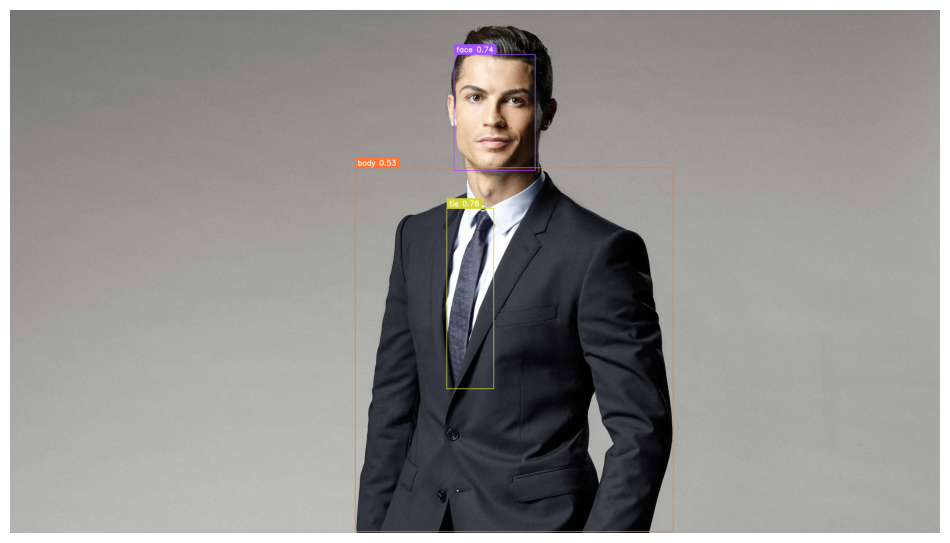

In [8]:
#РАБОЧАЯ ВЕРСИЯ

IMAGE_PATH = os.path.join(IMAGE_DIR, random.choice(os.listdir(IMAGE_DIR)))

results = base_model.predict(IMAGE_PATH).with_nms()
results = results[results.confidence > MINIMUM_CONFIDANCE]

image = cv2.imread(IMAGE_PATH)

# Извлекаем нужные данные из results
boxes = results.xyxy
confidence = results.confidence
class_id = results.class_id
classes = [classes[0] for classes in base_model.ontology.promptMap]
labels = [f"{classes[i]} {c:.2f}" for i, c in zip(class_id, confidence)]

print(classes)
print(boxes)
print(class_id)
print(confidence)

# Используем detections
detections = sv.Detections(
    xyxy=boxes,
    confidence=confidence,
    class_id=class_id
)

# 2. Создание аннотаторов

# Bounding Box Annotator: рисует bounding box
box_annotator = sv.BoxAnnotator(
    thickness=2

)

# Label Annotator: добавляет текст (класс и уверенность)
label_annotator = sv.LabelAnnotator(

    text_thickness=2,
    text_scale=1
)

# 3. Аннотирование изображения

labels = [
    f"{classes[class_id]} {confidence:.2f}"
    for confidence, class_id in zip(detections.confidence, detections.class_id)
]

annotated_image = box_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)



sv.plot_image(image=annotated_image)

If your prompt does not work well, update your ontology to use a new prompt.

It may take a few tries to find a prompt that works.

Note that Grounding DINO, on which Grounded SAM 2 depends for object identification, cannot identify all objects. If, after experimentation, you cannot get the model to identify objects of interest, this model may not be suited to your task.

## Label the dataset

Once you have found a prompt that works for your dataset, you can label your dataset like so:

In [9]:
base_model.label(IMAGE_DIR, extension="jpg")

Labeling peoples/img11.jpg: 100%|██████████| 11/11 [00:41<00:00,  3.81s/it]


Labeled dataset created - ready for distillation.


With a labeled dataset ready, the next step is to inspect the quality of the labels and train your model. Roboflow has utilities for both of these steps. With Roboflow, you can review and amend annotations, then use your dataset to train a model.

[Create a free Roboflow account](https://roboflow.com), then create a new project in your Roboflow dashboard. Once you have a new project, you can upload your labeled data to the platform with the following code: